In [4]:
from tensorflow.keras.models import load_model

model_save_path = 'D:/project 7th sem/minor project/model/crop_disease_prediction_model.h5'
model = load_model(model_save_path)
print("Trained model loaded successfully!")

Trained model loaded successfully!


In [5]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [7]:
# Paths
model_save_path = 'D:/project 7th sem/minor project/model/crop_disease_prediction_model.h5'
valid_path = r"D:/project 7th sem/minor project/Dataset/valid"

In [8]:
model = load_model(model_save_path)
print("Trained model loaded successfully!")

Trained model loaded successfully!


In [9]:
data_gen_valid = ImageDataGenerator(rescale=1./255)
validation_generator = data_gen_valid.flow_from_directory(
    valid_path,
    target_size=(224, 224),  # Image size should match training size
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep predictions aligned with labels
)

Found 17572 images belonging to 38 classes.


In [10]:
# Get true labels and predicted labels
y_true = validation_generator.classes  # True labels
y_pred = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes

c:\Users\Minal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


550/550 ━━━━━━━━━━━━━━━━━━━━ 876s 2s/step


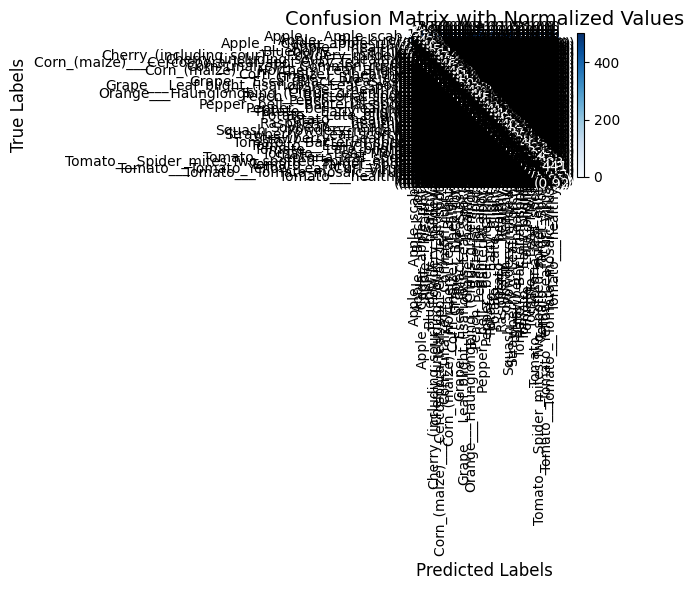

In [11]:
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix for better readability
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(validation_generator.class_indices.keys()))

# Plot the confusion matrix with enhancements
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical', colorbar=True)

# Add annotations for each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text_color = "white" if cm_normalized[i, j] > 0.5 else "black"
        ax.text(j, i, f"{cm[i, j]}\n({cm_normalized[i, j]:.2f})",
                ha="center", va="center", color=text_color, fontsize=10)

# Add title and axis labels
plt.title("Confusion Matrix with Normalized Values", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
report = classification_report(y_true, y_pred_classes, target_names=list(validation_generator.class_indices.keys()))
print("Classification Report:\n", report)

Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.86      0.89       504
                                 Apple___Black_rot       0.96      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.92      0.95       440
                                   Apple___healthy       0.96      0.95      0.96       502
                               Blueberry___healthy       0.98      0.95      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.88      0.89       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight     

In [13]:
# Precision, Recall, F1 Scores per Class
precision = []
recall = []
f1_scores = []
for i in range(len(cm)):  # Fixed cm definition
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    precision.append(tp / (tp + fp) if (tp + fp) > 0 else 0)
    recall.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
    f1_scores.append((2 * precision[-1] * recall[-1]) / (precision[-1] + recall[-1]) if (precision[-1] + recall[-1]) > 0 else 0)


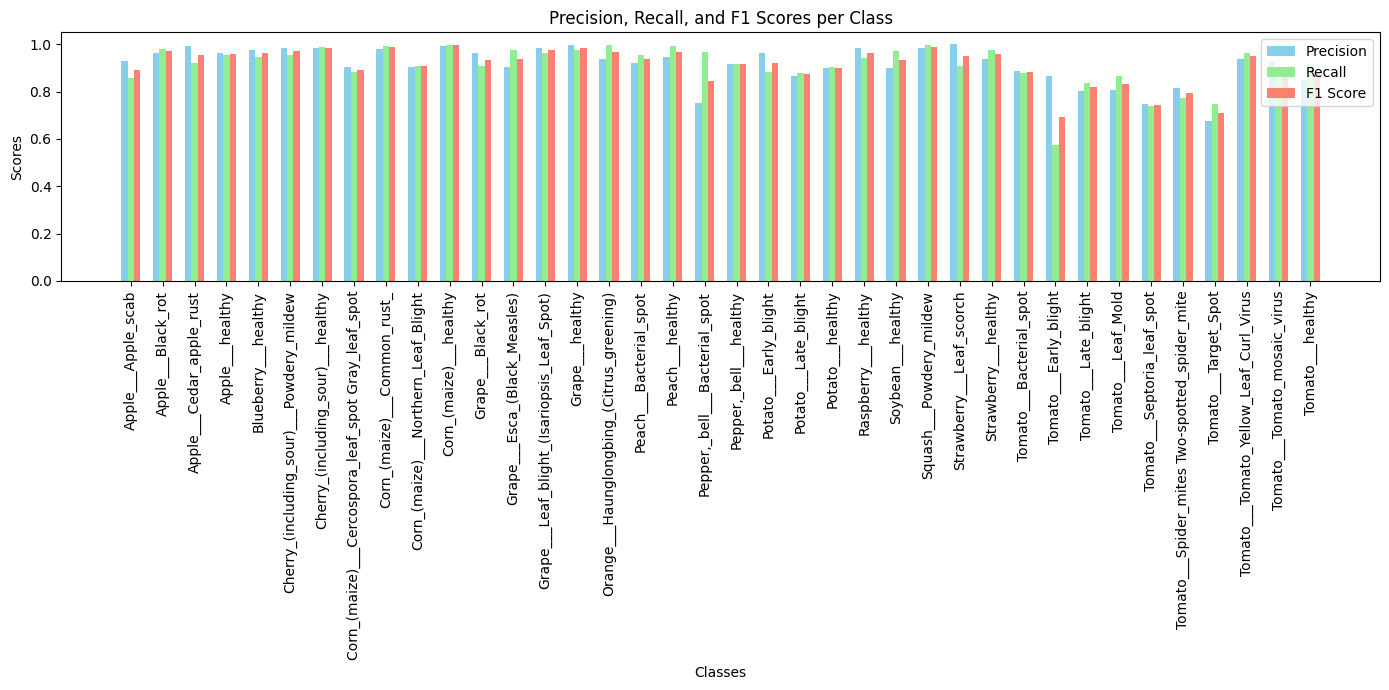

In [14]:
# Plot Precision, Recall, F1 Scores
classes = list(validation_generator.class_indices.keys())
x = np.arange(len(classes))
plt.figure(figsize=(14, 7))
plt.bar(x - 0.2, precision, width=0.2, label='Precision', color='skyblue')
plt.bar(x, recall, width=0.2, label='Recall', color='lightgreen')
plt.bar(x + 0.2, f1_scores, width=0.2, label='F1 Score', color='salmon')
plt.xticks(x, classes, rotation='vertical')
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Precision, Recall, and F1 Scores per Class")
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# Save Metrics in a File
metrics_report_path = "D:/project 7th sem/minor project/metrics_report.txt"
with open(metrics_report_path, 'w') as file:
    file.write("Classification Report:\n")
    file.write(report)
print(f"Metrics saved to {metrics_report_path}")

Metrics saved to D:/project 7th sem/minor project/metrics_report.txt


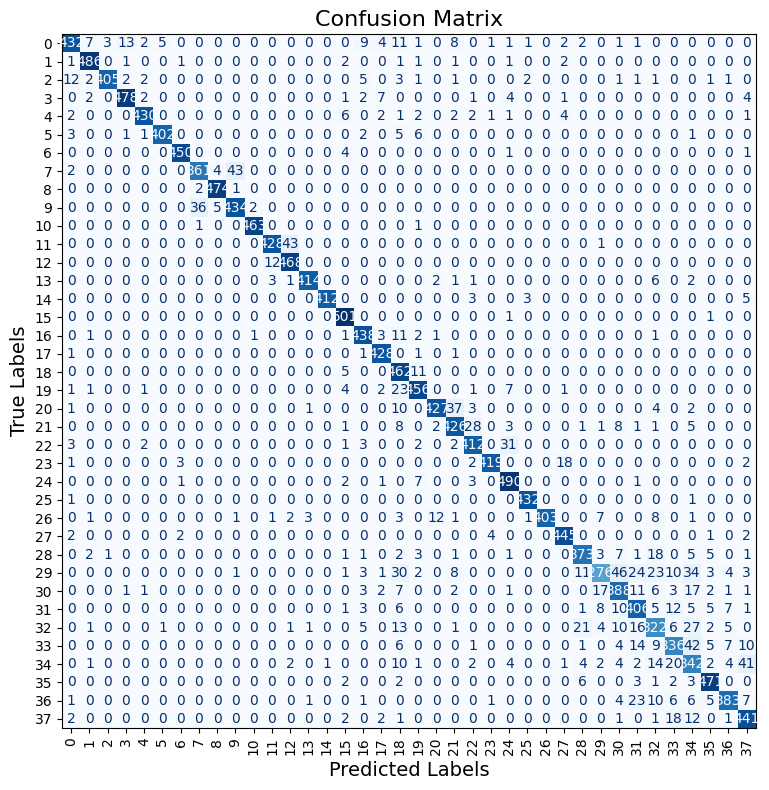

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix with larger dimensions
fig, ax = plt.subplots(figsize=(8, 8))  # Increased figure size for clarity
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical', colorbar=False)

# Set overall X and Y axis labels
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)

# Add title
plt.title("Confusion Matrix", fontsize=16)

# Simplify layout
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
metrics_report_path = "D:/project 7th sem/minor project/metrics_report.txt"
with open(metrics_report_path, 'w') as file:
    file.write("Classification Report:\n")
    file.write(report)
print(f"Metrics saved to {metrics_report_path}")

Metrics saved to D:/project 7th sem/minor project/metrics_report.txt
